<h1>로지스틱 회귀</h1>

# 라이브러리와 데이터

In [2]:
# libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # 훈련/평가 데이터 분리
from sklearn.linear_model import LogisticRegression  # 로지스틱회귀 모델

In [4]:
# read data
df = pd.read_csv('data03_carseat.csv')
df.head()

,Sales,SalesBin,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Dummy01,Dummy02,Dummy03,Dummy04,Dummy05,Dummy06
0,9.50,High,138,73,11,276,120,Bad,42,17,Yes,Yes,38,7,8,16,105,41
1,11.22,High,111,48,16,260,83,Good,65,10,Yes,Yes,21,5,23,12,155,22
2,10.06,High,113,35,10,269,80,Medium,59,12,Yes,Yes,29,7,3,26,195,27
3,7.40,Low,117,100,4,466,97,Medium,55,14,Yes,Yes,81,7,40,23,131,10
4,4.15,Low,141,64,3,340,128,Bad,38,13,Yes,No,71,7,7,11,129,14


# 데이터 세팅

In [5]:
Y = df['SalesBin']
Xorg = df.iloc[:,2:]
# making dummy variables
X = pd.get_dummies(Xorg,drop_first=True)

xtrain_org, xtest_org, ytrain, ytest = train_test_split(X,Y,test_size=0.5,random_state=0)

In [6]:
ytrain[:5]

,SalesBin
91,Low
59,Low
0,High
34,Low
28,Low


# 모든 변수를 이용한 예측

In [7]:
xtrain = xtrain_org
xtest = xtest_org

f = LogisticRegression(max_iter=10000)
f.fit(xtrain,ytrain)

LogisticRegression(max_iter=10000)

In [8]:
print(f.intercept_,f.coef_)

[6.36732601] [[-0.14180985 -0.03380799 -0.35551323 -0.00274203  0.1094108   0.04287114
   0.17595487 -0.01216128 -0.20850409  0.00326125 -0.08970089  0.0296992
  -0.06850012 -1.90130854 -0.1128427   0.56697921  0.55361221]]


In [9]:
# 훈련 데이터에 대한 예측
yhat_train = f.predict(xtrain)
pd.crosstab(yhat_train,ytrain)

SalesBin,High,Low
row_0,,
High,19,2
Low,2,27


In [10]:
f.score(xtrain,ytrain)

0.92

In [11]:
# 평가 데이터에 대한 예측
yhat_test = f.predict(xtest)
pd.crosstab(yhat_test,ytest)

SalesBin,High,Low
row_0,,
High,20,3
Low,4,23


In [12]:
f.score(xtest,ytest)

0.86

# 다양한 평가 지표들

In [13]:
from sklearn.metrics import recall_score, precision_score, f1_score

In [14]:
recall_score( ytest, f.predict(xtest), pos_label='High' )  # 20/24

0.8333333333333334

In [15]:
precision_score( ytest, f.predict(xtest), pos_label='High' ) # 20/23

0.8695652173913043

In [16]:
f1_score( ytest, f.predict(xtest), pos_label='High' )

0.851063829787234

# 예측 곡선

In [17]:
from sklearn.metrics import roc_curve, RocCurveDisplay

In [18]:
ytest_proba = f.predict_proba(xtest)
ytest_proba[:5,:]

array([[6.00202634e-01, 3.99797366e-01],
       [6.94899516e-01, 3.05100484e-01],
       [7.15966397e-01, 2.84033603e-01],
       [2.91061629e-03, 9.97089384e-01],
       [9.99913545e-01, 8.64551651e-05]])

In [19]:
fpr, tpr, th = roc_curve(ytest, ytest_proba[:,1], pos_label='High')

In [20]:
pd.DataFrame( np.array([fpr,tpr,th]).T, columns=['fpr','tpr','threshold'] )

,fpr,tpr,threshold
0,0.000000,0.000000,inf
1,0.038462,0.000000,0.999286
2,0.538462,0.000000,0.901136
3,0.538462,0.041667,0.898740
4,0.615385,0.041667,0.884830
5,0.615385,0.083333,0.874929
6,0.653846,0.083333,0.871436
7,0.653846,0.125000,0.861294
8,0.769231,0.125000,0.779624
9,0.769231,0.166667,0.756152


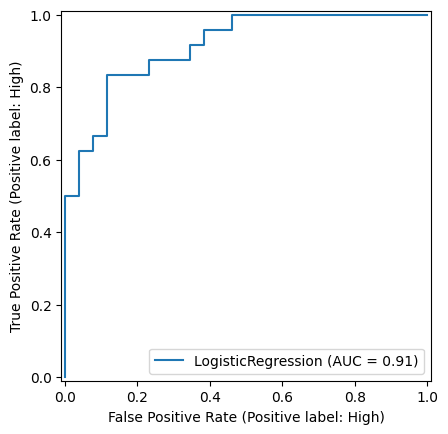

In [21]:
RocCurveDisplay.from_estimator(f,xtest,ytest,pos_label='High')

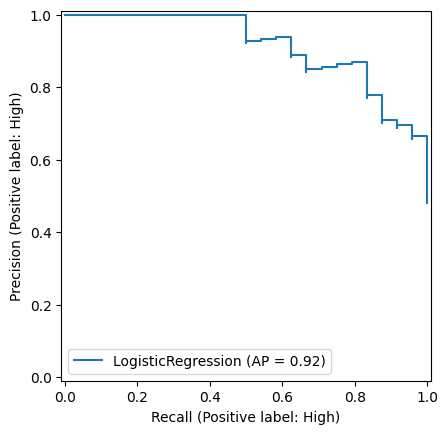

In [22]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
PrecisionRecallDisplay.from_estimator(f,xtest,ytest,pos_label='High')

# 연습문제

1. 위의 로지스틱회귀에서 불필요한 변수(dummy01~dummy06)를 모두 제거하였을 때의 훈련/평가 데이터 셋의 성능을 측정하시오.

In [3]:
df = pd.read_csv('data03_carseat.csv')
X = df.iloc[:,2:-6]
X = pd.get_dummies(X,drop_first=True)
Y = df['SalesBin']
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.5,random_state=0)

In [4]:
model = LogisticRegression(max_iter=10000)
model.fit(xtrain,ytrain)

LogisticRegression(max_iter=10000)

In [5]:
yhat_train = model.predict(xtrain)
pd.crosstab(yhat_train,ytrain)

SalesBin,High,Low
row_0,,
High,21,3
Low,0,26


In [6]:
model.score(xtrain, ytrain)

0.94

In [7]:
yhat_test = model.predict(xtest)
pd.crosstab(yhat_test,ytest)

SalesBin,High,Low
row_0,,
High,19,3
Low,5,23


In [8]:
model.score(xtest, ytest)

0.84

2. iris_noisy 데이터를 이용하여 로지스틱회귀 모델을 적용하시오. 모델 복잡성 예제에서 한 것과 같은 방식으로 훈련/평가 데이터를 분리하시오. 정확도, 재현율, 정밀도, F1 을 계산하고, ROC 커브와 Precision-Recall 커브를 그리시오. 모든 경우 1을 양성 클래스로 두고 푸시오.

In [9]:
df = pd.read_csv('data02_iris_noisy.csv')
X = df.iloc[:,:-1]
Y = df['Species']
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.4,random_state=0)

In [10]:
model = LogisticRegression(max_iter=10000)
model.fit(xtrain,ytrain)

LogisticRegression(max_iter=10000)

In [11]:
# 훈련 데이터에 대한 예측
yhat_train = model.predict(xtrain)
pd.crosstab(yhat_train,ytrain)

Species,0,1
row_0,,
0,30,5
1,3,22


In [12]:
model.score(xtrain,ytrain)

0.8666666666666667

In [13]:
# 평가 데이터에 대한 예측
yhat_test = model.predict(xtest)
pd.crosstab(yhat_test,ytest)

Species,0,1
row_0,,
0,14,4
1,3,19


In [14]:
model.score(xtest,ytest)

0.825

In [18]:
from sklearn.metrics import recall_score, precision_score, f1_score

In [16]:
from sklearn.metrics import roc_curve, RocCurveDisplay

In [19]:
# True Positive/True Positive+False Negative
recall_score( ytest,model.predict(xtest), pos_label=1 )

0.8260869565217391

In [20]:
 # True Positive/True Positive+False Positive
precision_score( ytest, model.predict(xtest), pos_label=1)

0.8636363636363636

In [21]:
f1_score( ytest, model.predict(xtest), pos_label=1 )

0.8444444444444444

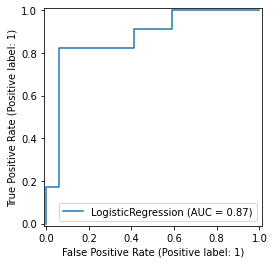

In [22]:
RocCurveDisplay.from_estimator(model,xtest,ytest,pos_label=1)

In [24]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

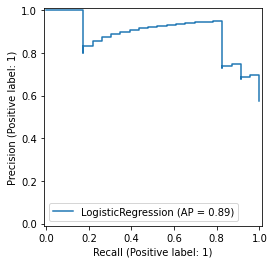

In [25]:
PrecisionRecallDisplay.from_estimator(model,xtest,ytest,pos_label=1)